## Third Assignment - Florian Klement

I found a dataset on Kaggle of books listed on goodreads that I will be using for the subsequent analysis and will compare this with the data from Amazon bestseller lists for 2009 to 2019.

#### .) Research questions: 
       1 Which authors are especially popular?
       2 Are these reflected in the Amazon bestlists?
       3 How do the ratings between these plattforms correlate?
       4 Are the rices on Amazon in accord with ratings on goodread or their own?
       5 Does the number of pages influence the ratings?
       6 What languages are most represented within the ratings in the goodreads dataset.
        

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mticker
import os
import seaborn as sns
%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [31]:
gr = pd.read_csv("books.csv")
gr.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


A couple of rows in the goodreads file seem to be corrupted by inconsistent comma usage. I remedy this in atom before proceeding.

## 1.)

In [170]:
x=gr.nlargest(50,'average_rating')
x['authors'] = y
y.head(15)

624      Aristophanes/F.W. Hall/W.M. Geldart
786          Julie Sylvester/David Sylvester
855                           Tara MacCarthy
1243    Middlesex Borough Heritage Committee
4126                              Tim Bogenn
4790                           John  Diamond
4935                         Elena N. Mahlow
5025         Ian        Martin/Katie Elliott
5476                              NOT A BOOK
5478                              NOT A BOOK
5649                Dennis Adler/R.L. Wilson
5650                          R. McL. Wilson
6187                            Ross Garnaut
6250                    Todd Davis/Marc Frey
6778         Nicholas    Evans/Rhonda  Evans
Name: authors, dtype: object

## 2.)

In [109]:
am = pd.read_csv("bestsellers with categories.csv")
am.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [171]:
am.loc[am['Author'].isin(y)]

,Name,Author,User Rating,Reviews,Price,Year,Genre
102,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,4.7,4370,15,2016,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
320,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2010,Non Fiction
321,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2011,Non Fiction
322,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2012,Non Fiction
323,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2013,Non Fiction
324,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2014,Non Fiction


While it is not a considerable overlap, there are at least some authors present in both sets. My guess would be that their evaluation stems from different sources. While goodreads lists quite a few authors which are highly canonical within their highest ranking, those aren't necessarily authors that sell well short term, even if they do so consistently.

## 3.)

In [139]:
comp = pd.merge(am, gr, left_on=["Name"], right_on = ["title"])
comp.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Alexander Hamilton,Ron Chernow,4.8,9198,13,2016,Non Fiction,16130,Alexander Hamilton,Ron Chernow,4.23,0143034758,9780143034759,eng,818,97099,6149,3/29/2005,Penguin Books
1,Fahrenheit 451,Ray Bradbury,4.6,10721,8,2016,Fiction,4382,Fahrenheit 451,Ray Bradbury/Christopher Hurt,3.99,078617627X,9780786176274,eng,5,483,146,11/1/2005,Blackstone Audiobooks
2,Fahrenheit 451,Ray Bradbury,4.6,10721,8,2016,Fiction,7656,Fahrenheit 451,Ray Bradbury,3.99,8445074873,9788445074879,eng,186,5733,606,4/1/2004,Del Rey
3,Fahrenheit 451,Ray Bradbury,4.6,10721,8,2016,Fiction,37683,Fahrenheit 451,Ray Bradbury/Alfredo Crespo,3.99,8497930053,9788497930055,spa,176,580,64,11/29/2004,Debolsillo
4,Fahrenheit 451,Ray Bradbury,4.6,10721,8,2018,Fiction,4382,Fahrenheit 451,Ray Bradbury/Christopher Hurt,3.99,078617627X,9780786176274,eng,5,483,146,11/1/2005,Blackstone Audiobooks


<AxesSubplot:>

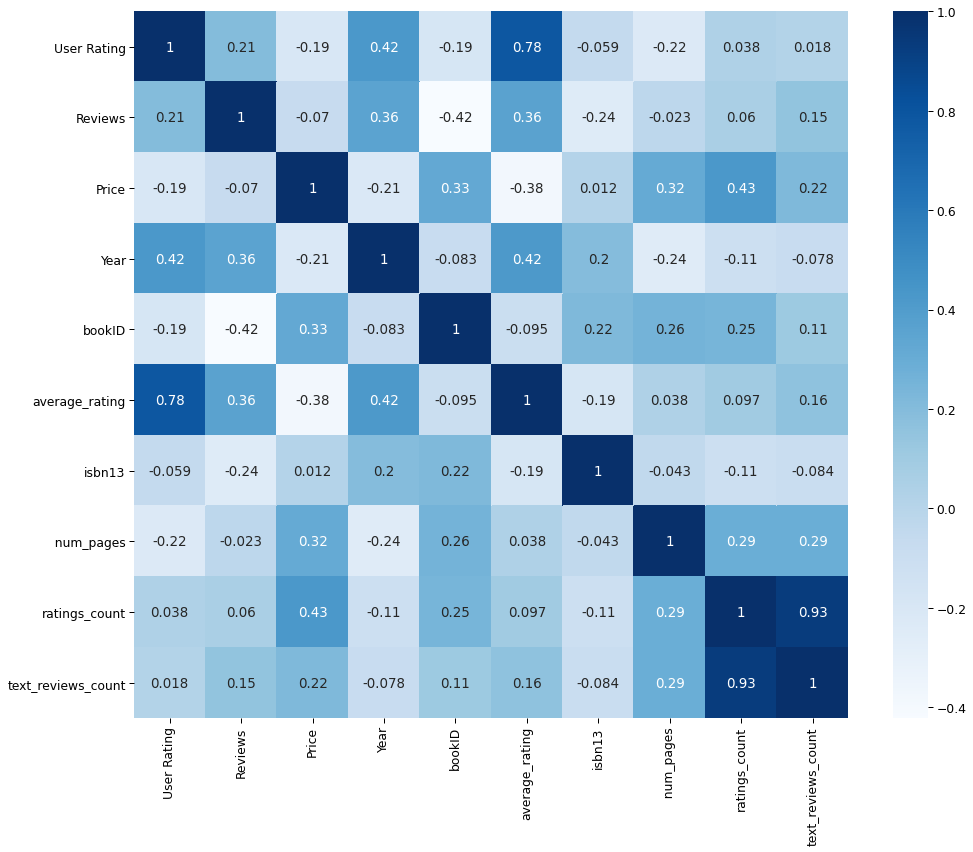

In [177]:
plt.figure(figsize=(16,13))
sns.set_context('paper', font_scale=1.4)
comp_mx = comp.corr()
sns.heatmap(comp_mx, annot=True, cmap='Blues')

The "average_rating" of Goodreads users for books that were also included in the Amazon best lists, seems to correspond to the "User rating" of the associated books sold via Ammazon. Though neither correspond fully to the prices won. Let's look at those further.

## 4.)

<AxesSubplot:xlabel='Year', ylabel='Price'>

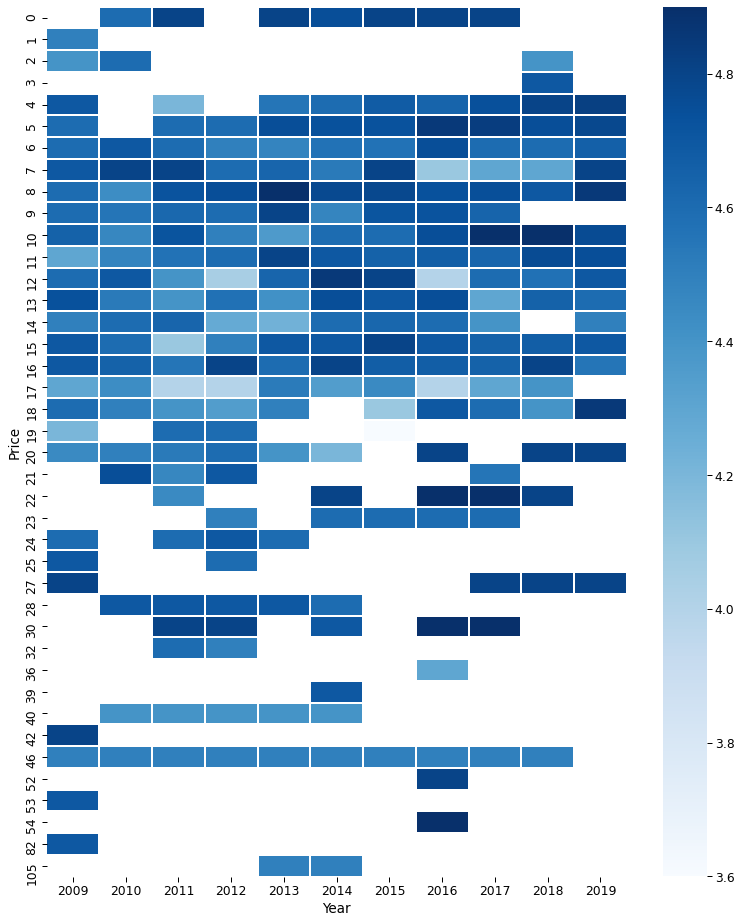

In [125]:
plt.figure(figsize=(13,16))
sns.set_context('paper', font_scale=1.4)
am_price = am.pivot_table(index='Price', columns='Year',  values='User Rating')
sns.heatmap(am_price, cmap='Blues', linecolor='white', linewidth=1)

While the user rating does seem to be an indicator for books to be on this list, the upper entries in the Amazon bestlists seem to consistently fly below the radar of user rankings and seem to be determined independently of this. A potential explanation for this could be external judical expertise. Maybe Amazon determines it's topmost entries in accordance with literary prices or opinion leaders instead.

## 5.)

<AxesSubplot:>

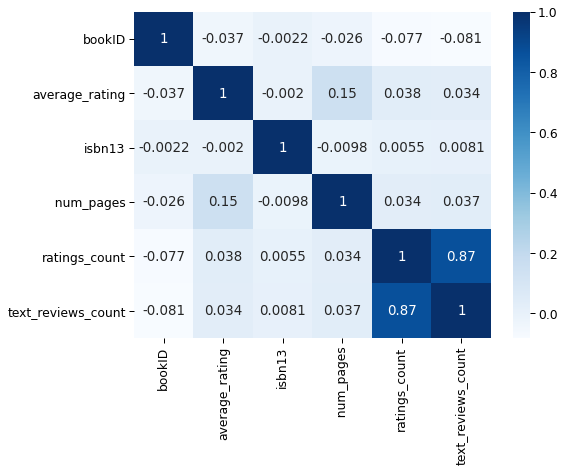

In [91]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
gr_mx = gr.corr()
sns.heatmap(gr_mx, annot=True, cmap='Blues')

There appears to be no correlation between the reviews and the pages count.

## 6.)

<AxesSubplot:xlabel='language_code', ylabel='ratings_count'>

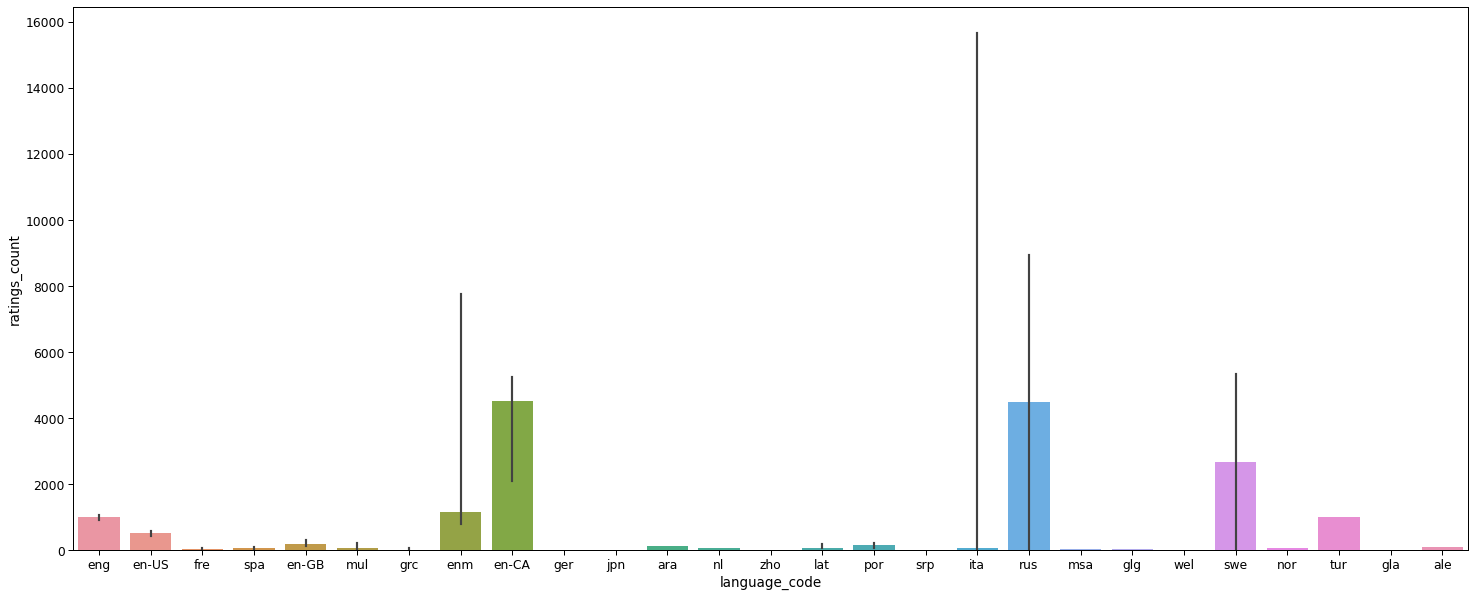

In [187]:
plt.figure(figsize=(25,10))
sns.barplot(x='language_code',y='ratings_count',data=gr, estimator=np.median)

It seems like the highest amount of ratings are for English, Russian, Swedish and Turkish books.